<a href="https://colab.research.google.com/github/epsit03/result-validation-with-keras-ocr/blob/master/resultValidator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q keras-ocr

In [2]:
import keras_ocr
import matplotlib.pyplot as plt

In [3]:
!pip install fuzzywuzzy
!pip install python-Levenshtein

In [4]:
!pip install --upgrade google-auth

In [5]:
from google.cloud import storage

In [6]:
from google.auth import load_credentials_from_file
import json
from google.auth.transport.requests import Request
from google.oauth2.credentials import Credentials
from google_auth_oauthlib.flow import InstalledAppFlow
# Import the service_account module
from google.oauth2 import service_account

service_account_info = json.load(open('/content/sample-400009-af70b44108d4.json'))
# Use the correct function from the imported module
credentials = service_account.Credentials.from_service_account_info(service_account_info)


In [7]:
PROJECT_ID = "sample-400009"  # Replace with your project ID
BUCKET_NAME = "my-colab-images"  # Replace with your bucket name
CREDENTIALS_FILE = "/content/sample-400009-af70b44108d4.json"  # Replace with the path to your JSON key file


In [8]:
with open("image1.png", "rb") as f:
    image_data = f.read()


In [9]:
client = storage.Client.from_service_account_json(CREDENTIALS_FILE)
bucket = client.get_bucket(BUCKET_NAME)
blob = bucket.blob("image1.png")  # Replace with desired filename
blob.upload_from_string(image_data)

print(f"Image uploaded to https://storage.googleapis.com/{BUCKET_NAME}/{blob.name}")


Image uploaded to https://storage.googleapis.com/my-colab-images/image1.png


In [22]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [23]:
images = [
    keras_ocr.tools.read(img) for img in ['/content/image1.png',
                                          '/content/WhatsApp Image 2024-02-26 at 12.32.17.jpeg'
    ]
]

Text(0.5, 1.0, 'Handwritten Text')

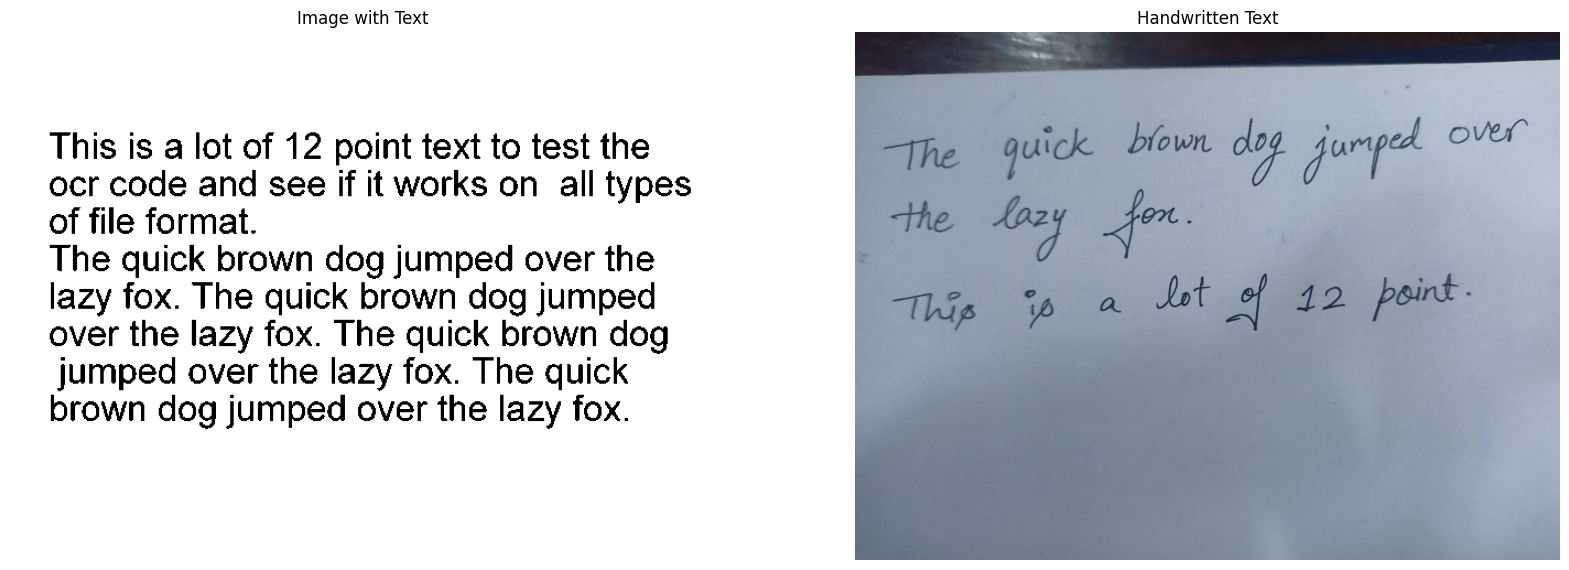

In [24]:
# Check image objects for images
from PIL import Image
# create figure
fig = plt.figure(figsize=(20, 10))

# setting values to rows and column variables
rows = 1
columns =2

# reading images
Image1 = Image.open('/content/image1.png')
Image2 = Image.open('/content/WhatsApp Image 2024-02-26 at 12.32.17.jpeg')

# First Image
fig.add_subplot(rows, columns, 1)
plt.imshow(Image1)
plt.axis('off')
plt.title ("Image with Text")

# Second Image
fig.add_subplot(rows, columns, 2)
plt.imshow(Image2)
plt.axis('off')
plt.title ("Handwritten Text")

In [25]:
prediction_groups = pipeline.recognize(images)

3/3 [==============================] - 24s 6s/step


2


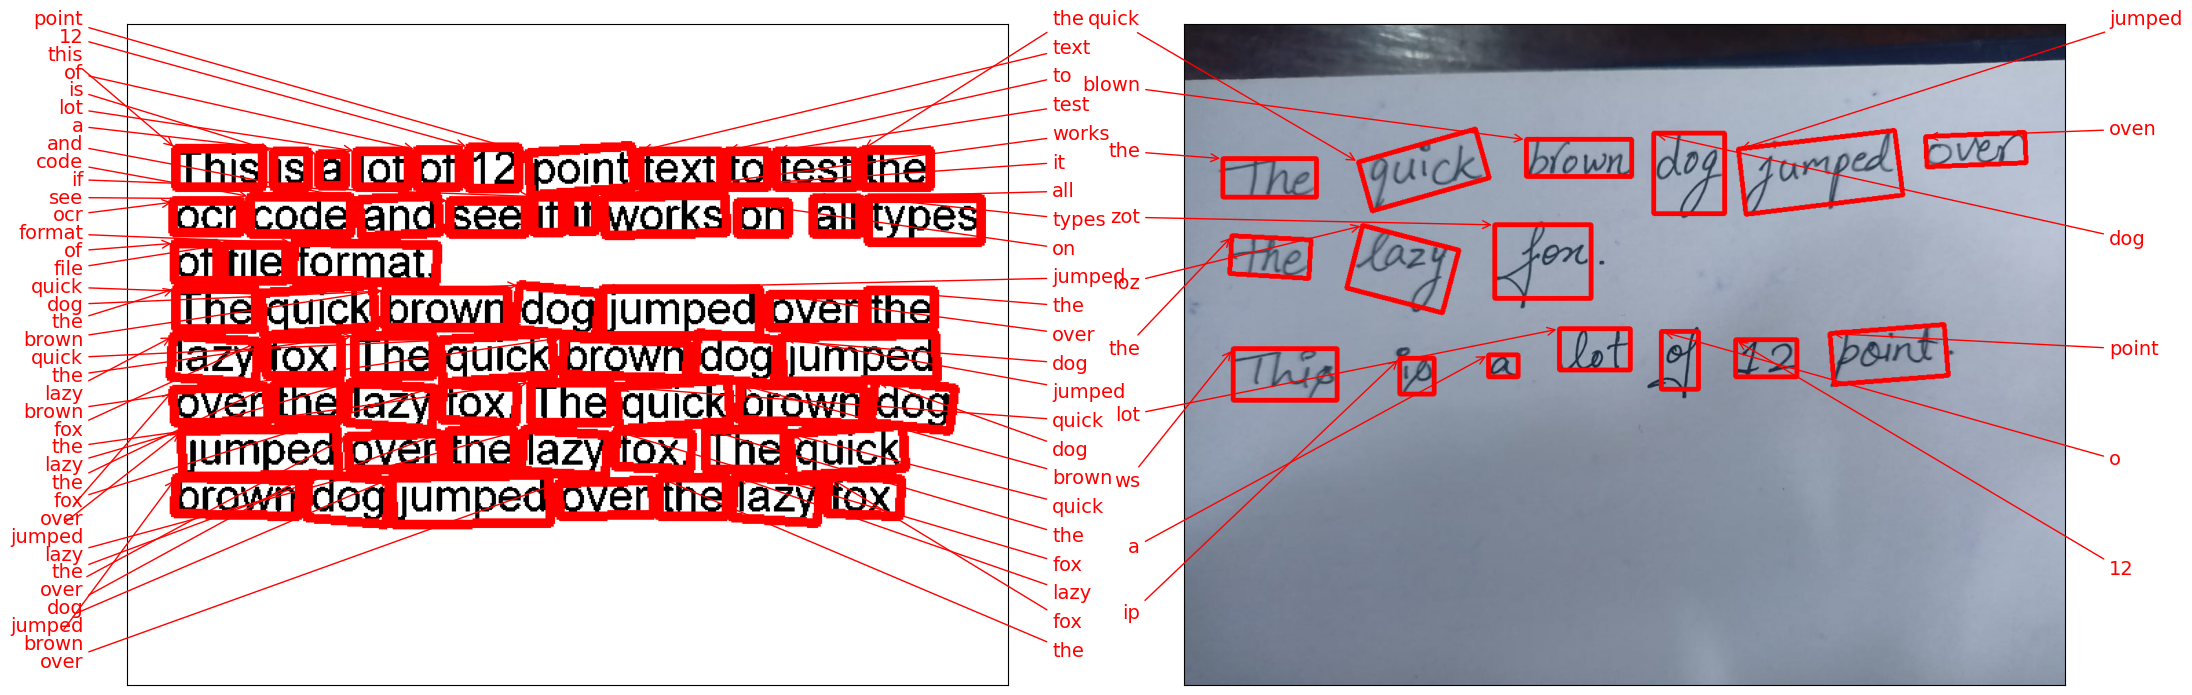

In [26]:
import matplotlib.pyplot as plt
import keras_ocr  # Assuming you have keras_ocr installed
print(len(images))
# Create a figure and multiple axes explicitly
fig, axs = plt.subplots(nrows=1, ncols=len(images), figsize=(25, 15))

# Iterate directly over the axes, as they are now a list
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)

plt.show()


In [27]:

predicted_image_1 = prediction_groups[0]
predicted_image_2 = prediction_groups[1]
for text, box in predicted_image_1:
    print(text)
print('---------------------')
for text, box in predicted_image_2:
  print(text)


12
this
of
point
the
is
lot
text
to
test
a
code
and
if
it
works
all
types
see
ocr
on
of
format
file
the
quick
brown
dog
jumped
the
over
the
quick
dog
jumped
fox
brown
lazy
the
the
quick
dog
lazy
fox
brown
over
quick
jumped
the
the
fox
lazy
over
dog
jumped
the
fox
brown
lazy
over
---------------------
jumped
oven
dog
blown
quick
the
zot
loz
the
point
lot
o
12
ws
a
ip


In [28]:
predicted_image_1 = prediction_groups[0]
predicted_image_2 = prediction_groups[1]
text_list1 = []
text_list2 = []

for text, box in predicted_image_1:
    text_list1.append(text)

print(text_list1)  # This will print the list of extracted text

for text, box in predicted_image_2:
  text_list2.append(text)

print(text_list2)

['12', 'this', 'of', 'point', 'the', 'is', 'lot', 'text', 'to', 'test', 'a', 'code', 'and', 'if', 'it', 'works', 'all', 'types', 'see', 'ocr', 'on', 'of', 'format', 'file', 'the', 'quick', 'brown', 'dog', 'jumped', 'the', 'over', 'the', 'quick', 'dog', 'jumped', 'fox', 'brown', 'lazy', 'the', 'the', 'quick', 'dog', 'lazy', 'fox', 'brown', 'over', 'quick', 'jumped', 'the', 'the', 'fox', 'lazy', 'over', 'dog', 'jumped', 'the', 'fox', 'brown', 'lazy', 'over']
['jumped', 'oven', 'dog', 'blown', 'quick', 'the', 'zot', 'loz', 'the', 'point', 'lot', 'o', '12', 'ws', 'a', 'ip']


In [29]:
from fuzzywuzzy import process

# Fuzzy matching with threshold
for word1 in text_list1:
    matches = process.extract(word1, text_list2, limit=3)
    for match in matches:
        if match[1] >= 80:  # Set custom threshold
            print(f"{word1} matches {match[0]} with {match[1]}% similarity")


12 matches 12 with 100% similarity
of matches o with 90% similarity
point matches point with 100% similarity
point matches o with 90% similarity
the matches the with 100% similarity
the matches the with 100% similarity
lot matches lot with 100% similarity
lot matches o with 90% similarity
to matches o with 90% similarity
a matches a with 100% similarity
code matches o with 90% similarity
and matches a with 90% similarity
works matches o with 90% similarity
all matches a with 90% similarity
ocr matches o with 90% similarity
on matches o with 90% similarity
of matches o with 90% similarity
format matches o with 90% similarity
format matches a with 90% similarity
the matches the with 100% similarity
the matches the with 100% similarity
quick matches quick with 100% similarity
brown matches o with 90% similarity
brown matches blown with 80% similarity
dog matches dog with 100% similarity
dog matches o with 90% similarity
jumped matches jumped with 100% similarity
the matches the with 100% 